# Ensemble Learning 不同做法

- Bagging (可以重複抽樣)
- Pasting (不可以重複抽樣)
- Random Subspaces (樣本都用，但 features 隨機抽樣)
- Random Patches ( 樣本、features 都隨機抽樣 )

> Out-of-bag Evaluate:

> 將當次未加入訓練的資料、樣本當作驗證資料，計算出 OOB Score 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=0.3, random_state=1)

In [5]:
def plot_dataset(x, y, axes):
  plt.plot(x[y==0, 0], x[y==0, 1], "ro", markersize=3)
  plt.plot(x[y==1, 0], x[y==1, 1], "g^", markersize=3)
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20)

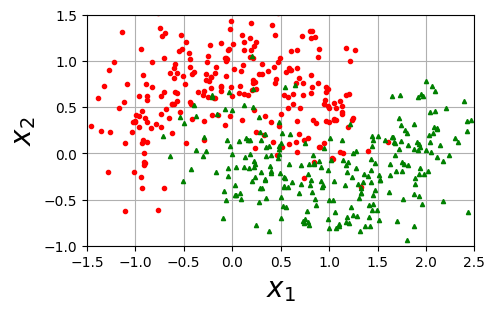

In [6]:
plt.figure(figsize=(5, 3))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 先來試試沒有經過 esemble learning 的決策樹

tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(x_train, y_train)
tree_clf.score(x_train, y_train), tree_clf.score(x_test, y_test)

# 可以發現這個模型有明顯的 overfitting 問題

(1.0, 0.848)

## Bagging(可以重複抽樣)

In [9]:
from sklearn.ensemble import BaggingClassifier

base_clf = DecisionTreeClassifier()

bag_clf = BaggingClassifier(
  base_clf, # 使用的基本模型
  n_estimators=500, # 使用 500 個基本模型
  max_samples=100, # 每個基本模型使用 100 筆資料
  max_features=2, # 每個基本模型使用 2 個 feature
  bootstrap=True, # 可以重複抽取樣本
  bootstrap_features=False, # 不重複抽取 feature
  oob_score=True, # 會計算 oob score
  random_state=1
)

bag_clf.fit(x_train, y_train)

bag_clf.score(x_train, y_train), bag_clf.score(x_test, y_test)

(0.9386666666666666, 0.856)

In [10]:
bag_clf.oob_score_

0.904

In [11]:
bag_clf.oob_decision_function_[:3]

# [為 0 的機率, 為 1 的機率]

array([[0.82914573, 0.17085427],
       [0.9625    , 0.0375    ],
       [0.97680412, 0.02319588]])

In [12]:
def plot_decision_boundary(clf, x, y, axes=[-1.5, 2.5, -1, 1.5]):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  x_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(x_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.2)
  plt.contour(x1, x2, y_pred)

  plot_dataset(x, y, axes)

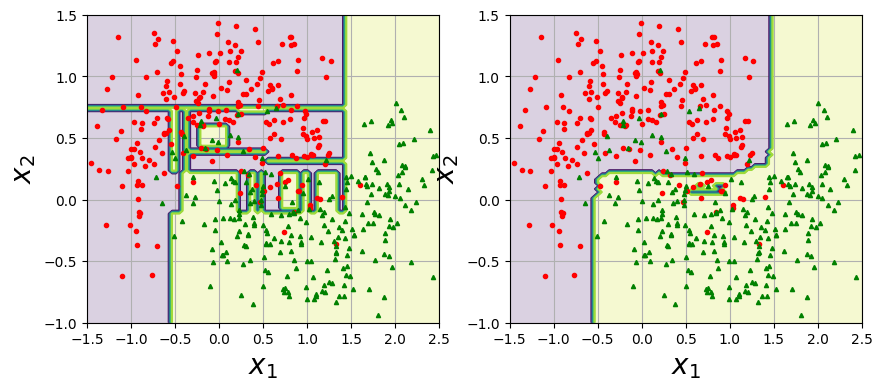

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf, x, y)
plt.subplot(122)
plot_decision_boundary(bag_clf, x, y)
plt.show()

'''
從圖片也看得出來：
左邊沒有使用集成學習、也沒有調整 max_depth: overfitting
右邊使用了集成學習: 分類較平滑
'''

## Pasting (不可以重複抽樣)

## Random Subspaces (樣本都用，但 features 隨機抽樣)

## Random Patches ( 樣本、features 都隨機抽樣 )

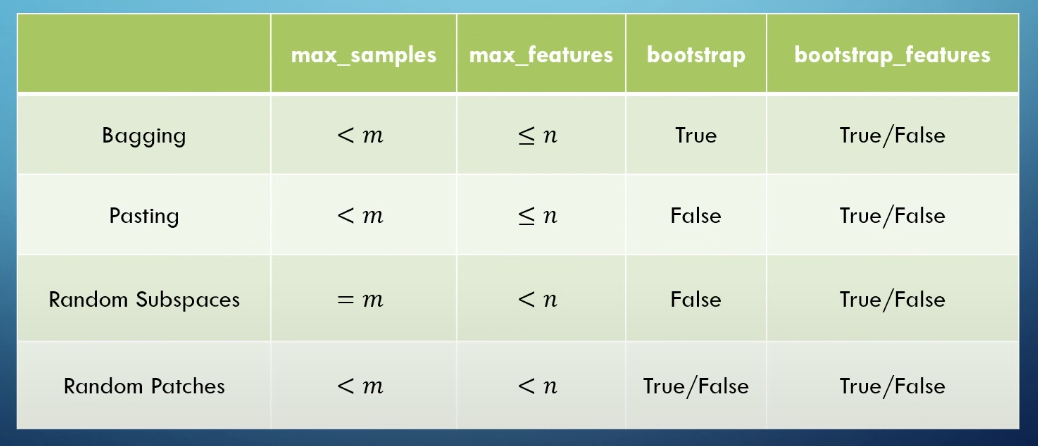

剩下的 esemble learning 都是透過 BaggingClassifier 實作，唯參數不相同